**Importing neccessary modules**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#importing the necessary dataset from keras library
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
print('count of samples in the datasets:',len(X_train))

count of samples in the datasets: 60000


In [8]:
#count of testing data
print('count of testing samples in the datasets:',len(X_test))

count of testing samples in the datasets: 10000


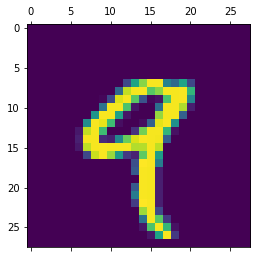

In [11]:
#displaying the image wherein the values ranges from 0-255
#below image reperesents a handwritten digit which lies between 0 to 9(inclusive)
plt.matshow(X_train[4])

In [12]:
#now we need to flatten the data residing ib the dataset
#2d to 1d array conversion
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [20]:
#number of output layers is 10(0-9)
#number of input layers are in the form(784,)
model=tf.keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

#compile the given model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
                 )     

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6816 - accuracy: 0.8409
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0110 - accuracy: 0.8779
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6871 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4250 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3693 - accuracy: 0.8858


In [21]:
#Scaling to improvise the accuracy of the given model
X_train=X_train/255
t_train=y_train/255

In [24]:
#2d array representing all the values within 0 to 1(inclusive)
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
#now we need to flatten the data residing ib the dataset
#2d to 1d array conversion
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [26]:
#number of output layers is 10(0-9)
#number of input layers are in the form(784,)
model=tf.keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

#compile the given model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
                 )     

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4694 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9254


In [30]:
#evaluation of the model
X_test_flattened=X_test.reshape(len(X_test),(28*28))
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 47.1341 - accuracy: 0.9141


[47.13405227661133, 0.9140999913215637]

In [31]:
#prediction and confusion matrix
y_predict=model.predict(X_test_flattened)

In [34]:
y_predict_labels=[np.argmax(i) for i in y_predict]

In [36]:
#generating a confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1121,    5,    2,    0,    1,    2,    1,    3,    0],
       [ 106,   76,  816,    4,   10,    0,    3,    2,   13,    2],
       [  51,    4,  204,  742,    1,    3,    0,    2,    3,    0],
       [  11,    2,    9,   31,  912,    0,    6,    2,    9,    0],
       [ 106,    7,   34,  293,   30,  396,    8,    0,   17,    1],
       [  99,    3,  287,    3,   52,   41,  470,    1,    2,    0],
       [  32,   18,   78,  457,   59,    3,    0,  378,    3,    0],
       [  31,   28,   82,  271,   21,   95,   17,   13,  416,    0],
       [  19,   11,    3,  188,  483,    6,    0,  161,   70,   68]],
      dtype=int32)>

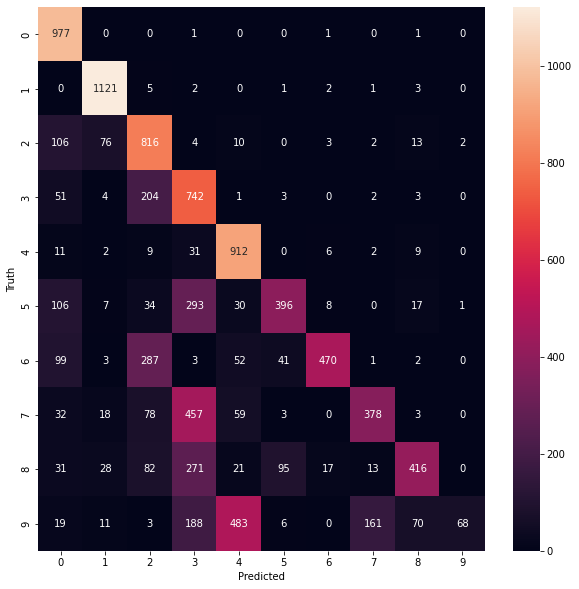

In [40]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
#introduction of hidden layer
#number of output layers is 10(0-9)
#number of input layers are in the form(784,)
model=tf.keras.Sequential(
    
    [keras.layers.Dense(100,input_shape=(784,),activation='relu'),keras.layers.Dense(10,activation='sigmoid')
])

#compile the given model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
                 )     

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2712 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9845


In [44]:
#evaluation of the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 15.1119 - accuracy: 0.9750


[15.111907958984375, 0.9750000238418579]

In [45]:
#we have imporved the accuracy of the given model with the help of hidden layers